# Assignment 6: Reduction of dimensionality and recognition

### Exercise 1: Direct PCA method

In [398]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

#### a) Analytically compute eigenvectors and eigenvalues given four points.

#### b) Calculate and visualize PCA for 2D data from `points.txt`.

In [399]:
from a6_utils import *

In [400]:
def get_covariance_matrix(data: np.ndarray) -> np.ndarray:
    '''
        Calculates the covariance matrix
    '''
    
    data = data.T
    
    # Calculate the covariance matrix
    covariance_matrix = data.T @ data / (data.shape[0] -1)
    
    return covariance_matrix

In [401]:
def pca(pts: np.ndarray) -> np.ndarray:

    mean = np.mean(pts, axis=0)
    centered = pts - mean
            
    cov = get_covariance_matrix(centered.T)
    
    U,S,VT = np.linalg.svd(cov)
    #S = S[:]
    #U = U[:, :2]

    #projected = np.matmul(U, centered)
    #reconstructed = np.matmul(U, projected) + mean
    
    return cov, (U, S)

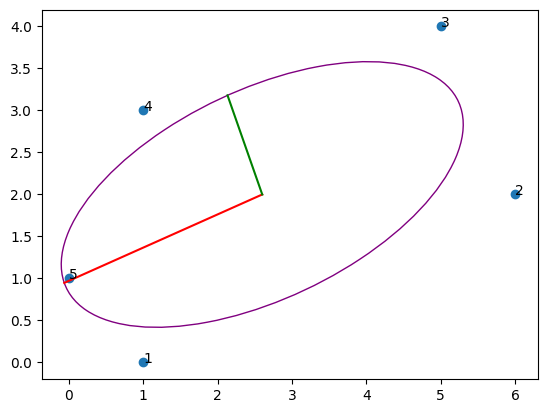

In [402]:

orig_points = np.loadtxt("data/points.txt")
points = orig_points.copy()
cov, (eigenvectors, eigenvalues) = pca(points)
mu = np.mean(points, axis=0)
drawEllipse(mu, cov)

plt.scatter(list(map(lambda x: x[0], points)), list(map(lambda x: x[1], points)))

for pt in range(len(points)):
    plt.annotate(pt+1, (points[pt][0], points[pt][1]))
   
# C
plt.plot([mu[0], mu[0] + eigenvectors[0,0] * np.sqrt(eigenvalues[0])], [mu[1], mu[1] + eigenvectors[0,1] * np.sqrt(eigenvalues[0])], color="red")
plt.plot([mu[0], mu[0] + eigenvectors[1,0] * np.sqrt(eigenvalues[1])], [mu[1], mu[1] + eigenvectors[1,1] * np.sqrt(eigenvalues[1])], color="green")


Q: What do you notice about the relationship between the eigenvectors and the data? What happens to the eigenvectors if you change the data or add more
points?
A: Their orientation changes. The eigenvectors show the direction of the biggest variance, so additional points may change them.

#### d) Plot the cumulative graph of eighenvalues and normalize it

[8.18975683 1.61024317]


<BarContainer object of 2 artists>

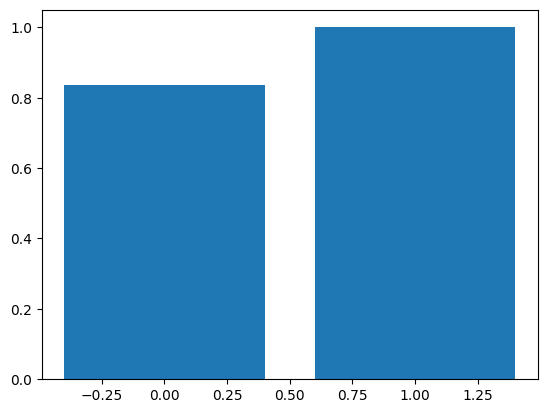

In [403]:
print(eigenvalues)
cumulative = np.cumsum(eigenvalues)
cumulative = cumulative / np.max(cumulative)
plt.bar([i for i in range(len(eigenvalues))], cumulative)

The first eigenvector alone explains 80% of the variance

#### e) Project data into the subspace of the first eigenvector

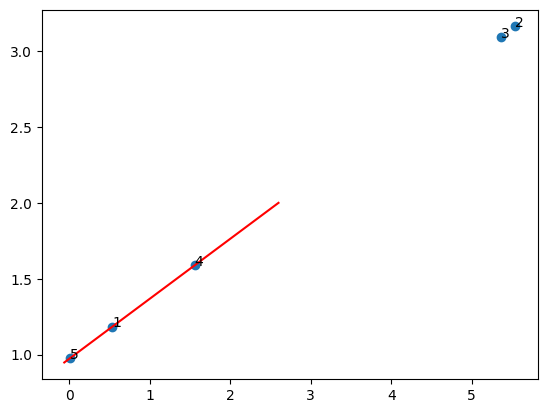

In [404]:
eigenvalues[1] = 0

centered_points = points - mu
vector = eigenvectors[0]

projected_points = centered_points @ eigenvectors[0]
projected_points = np.reshape(projected_points, (5,1))
vector = np.reshape(vector, (1,2))

reconstructed_points = projected_points @ vector + mu

plt.scatter(reconstructed_points[:,0], reconstructed_points[:,1])
for pt in range(len(points)):
    plt.annotate(pt+1, (reconstructed_points[pt][0], reconstructed_points[pt][1]))
   
# C
plt.plot([mu[0], mu[0] + eigenvectors[0,0] * np.sqrt(eigenvalues[0])], [mu[1], mu[1] + eigenvectors[0,1] * np.sqrt(eigenvalues[0])], color="red")


The data is projected onto the eigenvector. They are lying on a line.

#### f) Use q_point = [6, 6] and get the closest point. Project all the points to PCA subspace, and check which point is closest then.

Closest point: 3
[9.840435   4.86321177]
New closest point: 2


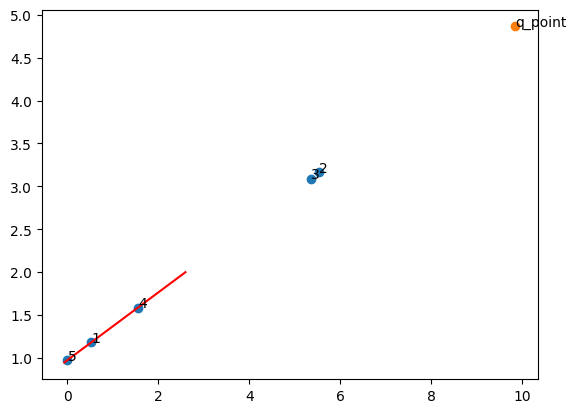

In [405]:
q_point = [6,6]

# Get closest point
min_dist = np.inf
closest_point = 0
ix = 1
for p in points:
    dist = np.sqrt(np.square(p[0] - 6) + np.square(p[1] - 6))
    if dist < min_dist:
        min_dist = dist
        closest_point = ix
    ix += 1

print("Closest point:",closest_point)


projected_q = q_point @ eigenvectors[0]
projected_q = np.reshape(projected_q, (1,1))
reconstructed_q = projected_q @ vector + mu 
reconstructed_q = np.reshape(reconstructed_q, (2,))
print(reconstructed_q)

plt.scatter(reconstructed_points[:,0], reconstructed_points[:,1])
for pt in range(len(points)):
    plt.annotate(pt+1, (reconstructed_points[pt][0], reconstructed_points[pt][1]))
plt.scatter(reconstructed_q[0], reconstructed_q[1])
plt.annotate("q_point", (reconstructed_q[0], reconstructed_q[1]))
plt.plot([mu[0], mu[0] + eigenvectors[0,0] * np.sqrt(eigenvalues[0])], [mu[1], mu[1] + eigenvectors[0,1] * np.sqrt(eigenvalues[0])], color="red")

min_dist = np.inf
closest_point = 0
ix = 1
for p in reconstructed_points:
    dist = np.sqrt(np.square(p[0] - reconstructed_q[0]) + np.square(p[1] - reconstructed_q[1]))
    if dist < min_dist:
        min_dist = dist
        closest_point = ix
    ix += 1    
print("New closest point:", closest_point) 
    


### Exercise 2: The dual PCA

#### a) Implement the dual method and test it using the data from `points.txt`

In [406]:
def get_covariance_matrix(data: np.ndarray) -> np.ndarray:
    '''
        Calculates the covariance matrix
    '''
    
    data = data.T
    
    # Calculate the covariance matrix
    covariance_matrix = data.T @ data / (data.shape[0] -1)
    
    return covariance_matrix

In [409]:
def dual_pca(pts: np.ndarray) -> np.ndarray:

    mean = np.mean(pts, axis=0)
    centered = pts - mean
            
    cov = get_covariance_matrix(centered.T)
    
    U,S,VT = np.linalg.svd(cov)
    
    U = pts @ U * (np.sqrt(1 / (S * (points.shape[0] - 1))))
    
    return cov, (U, S)

#### b) Project data from exercise 1

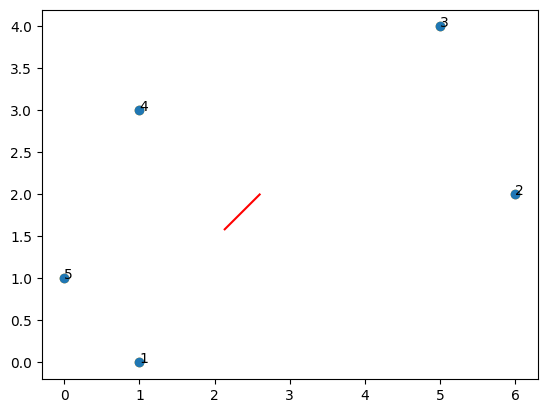

In [410]:
cov, (eigenvectors, eigenvalues) = dual_pca(points)

centered_points = points - mu

projected_points = eigenvectors.T @ (centered_points)
reconstructed_points = eigenvectors @ projected_points 

# Original points
plt.scatter(points[:, 0], points[:, 1], color="orange")

# Reconstructed points
plt.scatter(reconstructed_points[:,0], reconstructed_points[:,1])
for pt in range(len(points)):
    plt.annotate(pt+1, (reconstructed_points[pt][0], reconstructed_points[pt][1]))
   
# C
plt.plot([mu[0], mu[0] + eigenvectors[0,0] * np.sqrt(eigenvalues[0])], [mu[1], mu[1] + eigenvectors[0,1] * np.sqrt(eigenvalues[0])], color="red")


### Exercise 3: Image decomposition examples

#### a) Data preparation

In [429]:
import os
def load_images(path: str) -> np.ndarray:

    matrix = []
    for file in os.scandir(path):
        if file.is_file():
            img = cv2.imread(f"{path}{file.name}")
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            column = np.reshape(img, (1, -1)) 
            matrix.append(column.T)
    
    matrix = np.array(matrix)
    matrix = np.reshape(matrix, (64, -1))
    matrix = matrix.T
    return matrix

In [431]:
matrix = load_images("data/faces/1/")
print(matrix.shape)

(8064, 64)


#### b) Using dual PCA